## STFT

In [1]:
import librosa
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
speech1, fs =  librosa.load('spa_data/common_voice_es_18600219.mp3', sr=16000)

FileNotFoundError: [Errno 2] No such file or directory: 'spa_data/common_voice_es_18637534.wav'

In [49]:
def expdft(win_length, hopsize, N):
    pow_ = []
    for i in range(N):
        temp = []
        for m in range(i*hopsize, i*hopsize + win_length):
            temp.append(-3.14j*i*m/ N)
        pow_.append(temp)
    return np.exp(pow_)

def STFT(x, win_type, win_length, hopsize, num_freq_samples, fs):
    win_length = fs*win_length//1000
    hopsize = fs*hopsize//1000
    if win_type == 'hamming':
        w = np.hamming(win_length)
    else:
        w = [0*win_length]
    
    num_segments = ((len(x) - win_length)//hopsize) + 2

    #signal segments
    X = np.array([list(x[i*hopsize:i*hopsize+win_length]) for i in range(num_segments)\
                    if i*hopsize+win_length < len(x)])

    #padding signals on both ends
    padding = np.zeros((win_length))
    X = np.row_stack((padding, X))
    X = np.row_stack((X ,padding))
    
    #exp matrix powers
    E = expdft(win_length, hopsize, num_freq_samples)
 
    return np.dot(X[1:]*w, E.T)

def get_power_response(x):
    return 20*np.log10(np.abs(x)+0.00000001)

In [11]:
#Stft Params

X = speech1
WIN_TYPE = 'hamming'
WIN_LENGTH = 20
HOPSIZE = 10
NUM_FREQ_SAMPLES = 513
FS = fs

In [116]:
stft1 = np.abs(STFT(X, WIN_TYPE, WIN_LENGTH, HOPSIZE, NUM_FREQ_SAMPLES, FS))
stft2 = np.abs(signal.stft(X, FS, nfft=1024, nperseg=320)[2]).T[1:-1]

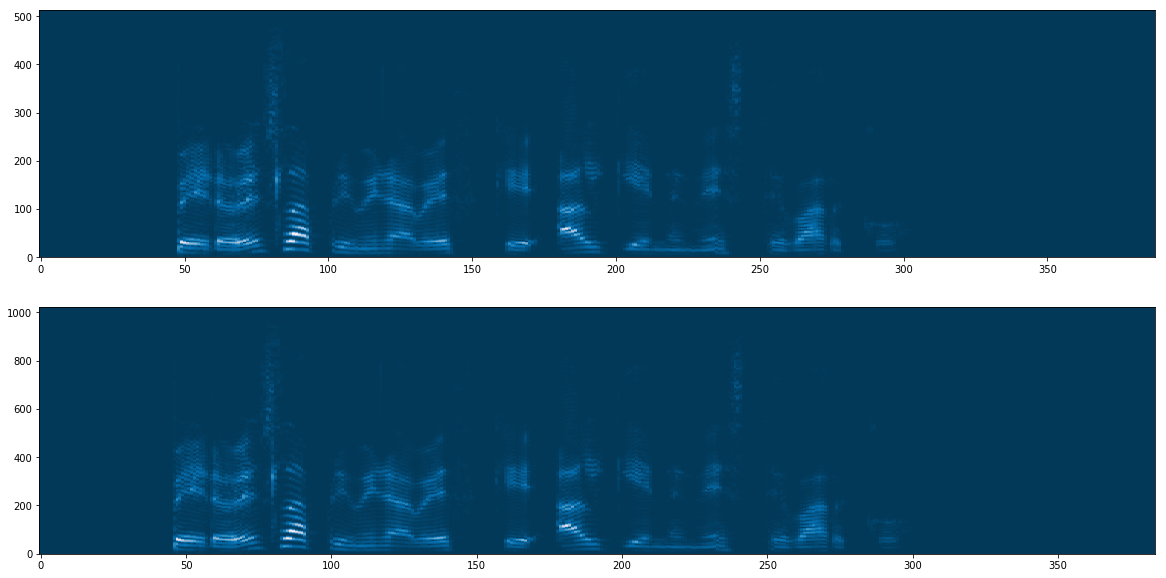

In [105]:

fig1, (ax1, ax2) = plt.subplots(2,1,figsize = (20, 10))
ax1.imshow(np.abs(signal.stft(X, FS, nfft=1024, nperseg=320)[2]), cmap = "PuBu_r", aspect = "auto", origin="lowest")
ax2.imshow(np.abs(stft1[1:-1].T), cmap = "PuBu_r", aspect = "auto", origin="lowest")
plt.show()

## MFCCs

In [2]:
import librosa.display

In [3]:
speech1, fs =  librosa.load('/home/anakuz/data/docs/iu_courses/dl_for_speech/project/spa_data/clips/common_voice_es_18771987.wav', sr=16000)

In [4]:
#mel_spec1 = librosa.feature.melspectrogram(speech1, sr=16000, n_fft=WIN_LENGTH, 
#                                           hop_length = HOPSIZE, window=WIN_TYPE,
#                                           n_mels=128,
#                                           fmax=8000)

mel_spec_test = librosa.feature.melspectrogram(y=speech1, sr=16000, n_mels=128, fmax=8000)
mfcc1 = librosa.feature.mfcc(S=mel_spec_test, n_mfcc=40)

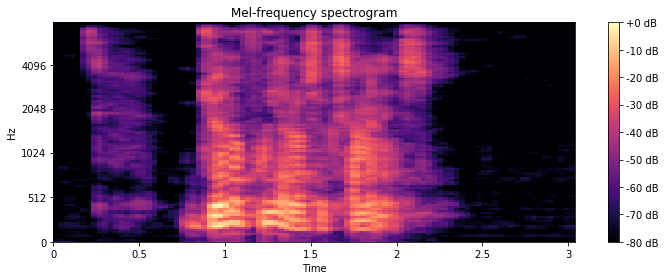

In [74]:
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(mel_spec_test, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=16000,
                          fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

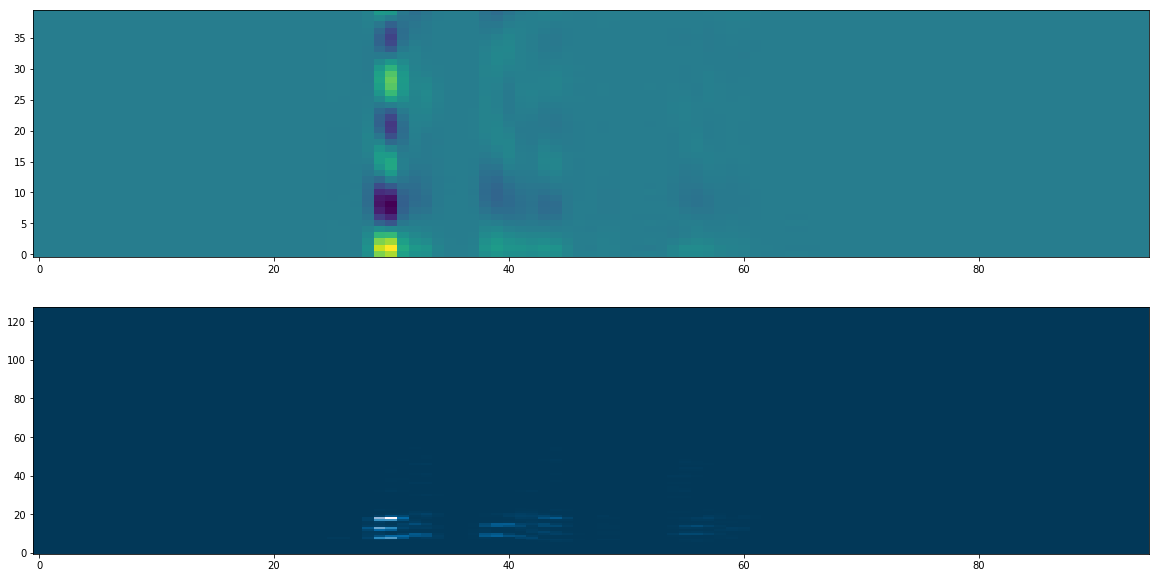

In [6]:
fig1, (ax1, ax2) = plt.subplots(2,1,figsize = (20, 10))
ax1.imshow(mfcc1, aspect = "auto", origin="lowest")
ax2.imshow(mel_spec_test, cmap = "PuBu_r", aspect = "auto", origin="lowest")
plt.show()

In [2]:
ab_path = '/home/anakuz/data/docs/iu_courses/dl_for_speech/project/spa_data/'

In [1]:
import os
from tqdm import tqdm
import pickle
import pandas as pd


def MFCC(path, tsv_path):
    files = pd.read_csv(path+tsv_path, sep='\t')['path']

    features = []
    for file in tqdm(files):
            try:
                speech, fs =  librosa.load(path+'clips/'+file, sr=16000)
                mel_spec = librosa.feature.melspectrogram(y=speech,
                                                          sr=16000,
                                                          n_mels=128, 
                                                          fmax=8000)
                mfcc_mat = librosa.feature.mfcc(S=mel_spec, n_mfcc=13)
                features.append(mfcc_mat)
                del(speech)
                del(mel_spec)
                del(mfcc_mat)
            
            except FileNotFoundError:
                print(file)
        
    with open('mfcc'+tsv_path[:-4]+'.pkl', 'wb') as f:
        pickle.dump(features, f)

In [4]:
MFCC(ab_path, 'train.tsv')

100%|██████████| 2432/2432 [08:00<00:00,  5.06it/s]


In [6]:
import os
from tqdm import tqdm
import pickle
import pandas as pd


def delta(path, tsv_path):
    files = pd.read_csv(path+tsv_path, sep='\t')['path']

    features = []
    for file in tqdm(files):
            try:
                speech, fs =  librosa.load(path+'clips/'+file, sr=16000)
                mel_spec = librosa.feature.melspectrogram(y=speech,
                                                          sr=16000,
                                                          n_mels=128, 
                                                          fmax=8000)
                mfcc_mat = librosa.feature.mfcc(S=mel_spec, n_mfcc=13)
                delta = librosa.feature.delta(mfcc_mat, order=2)
                features.append(mfcc_mat)
                del(speech)
                del(mel_spec)
                del(mfcc_mat)
                del(delta)
            
            except FileNotFoundError:
                print(file)
        
    with open('delta2'+tsv_path[:-4]+'.pkl', 'wb') as f:
        pickle.dump(features, f)

In [9]:
delta(ab_path, 'test.tsv')

100%|██████████| 1025/1025 [04:27<00:00,  3.83it/s]
